<a href="https://colab.research.google.com/github/sakshamssy/neuralNetwork-FuzzyLogic/blob/main/nnfl_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt


The cost function is defined as J=1/(2*m) \sum_{i=1}^{m}
(h(i)-y(i))^2; Hypothesis is evaluated as h=w^T X

In [3]:
def cost_function(X,y,w): ###define cost function
  hypothesis = np.dot(X,w.T) ###calculation of hypothesis for all instances
  J = (1/(2*len(y))) * np.sum((hypothesis - y) ** 2) ####as mention in the class notes
  # J = (1/(2*len(y))) * np.sum((hypothesis - y) ** 2)+(lamb/2)*np.sum(w**2) ####as mention
  return J

In [4]:
def batch_gradient_descent(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters) # cost function for each iteration
  #initalize our cost history list to store the cost function on every iteration
  for i in range(iters):
    hypothesis = np.dot(X,w.T)
    #w = (w*(1-alpha*lamb)) -(alpha/len(y)) * np.dot(hypothesis - y, X)
    w = w - (alpha/len(y)) * np.dot(hypothesis - y, X)
    #cost_history[i] = cost_function(X,y,w,lamb)
    cost_history[i] = cost_function(X,y,w)
  return w,cost_history

In [5]:
def MB_gradient_descent(X,y,w,alpha, iters, batch_size):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w, cost_history

In [6]:
def stochastic_gradient_descent(X,y,w,alpha, iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w, cost_history

In [7]:
data=pd.read_excel('/content/drive/MyDrive/data_NNFL1stTut.xlsx',header=None)
print(data)

       0        1       2
0    2.6  1360.00  13.600
1    2.0  1292.25  13.300
2    2.2  1402.00  11.900
3    2.2  1375.50  11.000
4    1.6  1272.25  11.150
..   ...      ...     ...
344  0.7   902.00   9.100
345  0.7   921.25   9.475
346  0.5   858.25   9.325
347  0.5   878.00   9.900
348  0.6   892.50   7.550

[349 rows x 3 columns]


In [13]:
datan=data.values
X=datan[:,[0,1]]
m=X.shape[0]
xmin=np.min(X,axis=0)
xmax=np.max(X,axis=0)
X = (X- xmin)/(xmax-xmin) #Normalization
print(X)

[[0.9735704  0.43764219]
 [0.97068717 0.38159255]
 [0.97164825 0.47238883]
 [0.97164825 0.45046536]
 [0.96876502 0.36504654]
 [0.96684286 0.30279214]
 [0.96684286 0.29286453]
 [0.96588179 0.25253361]
 [0.96540125 0.21758014]
 [0.96395963 0.14788004]
 [0.         0.14891417]
 [0.96444017 0.19441572]
 [0.96444017 0.18262668]
 [0.96636233 0.25894519]
 [0.97068717 0.41551189]
 [0.97164825 0.43019648]
 [0.96924556 0.3327818 ]
 [0.96828448 0.2876939 ]
 [0.96876502 0.33505688]
 [0.97020663 0.37600827]
 [0.97501201 0.4467425 ]
 [0.97164825 0.39627715]
 [0.97164825 0.3811789 ]
 [0.97501201 0.45667011]
 [0.98414224 0.62026887]
 [0.99423354 0.78138573]
 [0.99038924 0.66928645]
 [0.9798174  0.39855222]
 [0.96828448 0.11044467]
 [0.96588179 0.06763185]
 [0.96924556 0.20620476]
 [0.97020663 0.17600827]
 [0.96780394 0.12967942]
 [0.96492071 0.04777663]
 [0.         0.        ]
 [0.96395963 0.01344364]
 [0.96492071 0.07942089]
 [0.96780394 0.21468459]
 [0.98222009 0.6254395 ]
 [0.         0.59027921]


In [17]:
pp = np.ones([m, 1]) # vector containg ones as all elements
X = np.append(pp,X, axis=1) #Column of ones

In [19]:
X.shape

(349, 3)

In [20]:
print(X)

[[1.         0.9735704  0.43764219]
 [1.         0.97068717 0.38159255]
 [1.         0.97164825 0.47238883]
 ...
 [1.         0.9634791  0.02254395]
 [1.         0.9634791  0.03888314]
 [1.         0.96395963 0.05087901]]


In [21]:
y=datan[:,2] #output
ymin = np.min(y, axis = 0)
ymax = np.max(y, axis = 0)
y = (y- ymin)/(ymax-ymin) #Normalization


In [22]:
#Linear regression starts from here
w= np.zeros(X.shape[1]) ##weight initialization
#w=[0.5, 0.5, 0.5]
print(w)

[0. 0. 0.]


In [23]:
alpha=0.05 ##learning rate
iters=100 ###iterations
lamb=0.1
batch_w,J_his = batch_gradient_descent(X,y,w,alpha,iters,lamb)

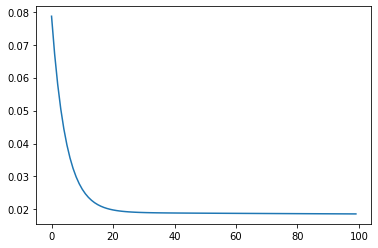

In [24]:
plt.plot(range(iters),J_his)
plt.show()

In [25]:
print(batch_w)

[0.18179998 0.16724029 0.11937219]


In [26]:
alpha=0.005
iters=1200
batch_size=50
mini_batch_w,J_mini_batch = MB_gradient_descent(X,y,w,alpha,iters, batch_size)

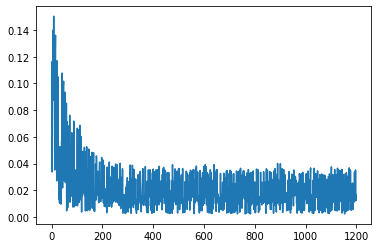

In [27]:
plt.plot(range(iters),J_mini_batch)
plt.show()

In [30]:
print(mini_batch_w)

[0.19169074 0.1763897  0.12548058]


In [31]:
n_epochs=3000
alpha=0.01
w_n,J_sgd = stochastic_gradient_descent(X,y,w, alpha, n_epochs)

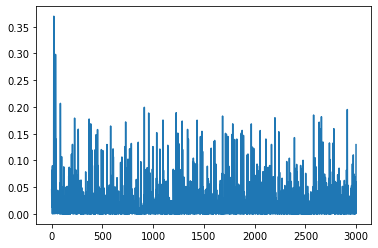

In [32]:
plt.plot(range(n_epochs),J_sgd)
plt.show()

In [33]:

print(w_n)

[0.17230573 0.1374975  0.25562687]
